# Introduction

Not all models are simple mathematical equations that can be plotted as a line. Instead, some complex models are easier thought of more like flow charts or traditional programming structures. Such models usually have extra levels of customization available, which can make them more powerful, though also trickier to work with. Throughout these exercises, we'll explore this by manipulating how models work and are trained. Although we'll focus on one type of model, the general principles taught here apply to many other model types as well.


# Decision trees and model architecture

When we talk about architecture, we often think of buildings. Architecture is responsible for how a building is structured; its height, its depth, the number of floors, and how things are connected internally. This architecture also dictates how we use a building: where we enter it and what we can "get out of it," practically speaking.

In machine learning, architecture refers to a similar concept. How many parameters does it have, and how are they linked together to achieve a calculation? Do we calculate a lot in parallel (width) or do we have serial operations that rely on a previous calculation (depth)? How can we provide inputs to this model, and how can we receive outputs? Such architectural decisions only typically apply to more complex models, and architectural decisions can range from simple to complex. These decisions are usually made before the model is trained, though in some circumstances there's room to make changes post-training.

Let’s explore this more concretely with decision trees as an example.


## What's a decision tree?

In essence, a decision tree is a flow chart. Decision trees are a categorization model that breaks down decisions into multiple steps.


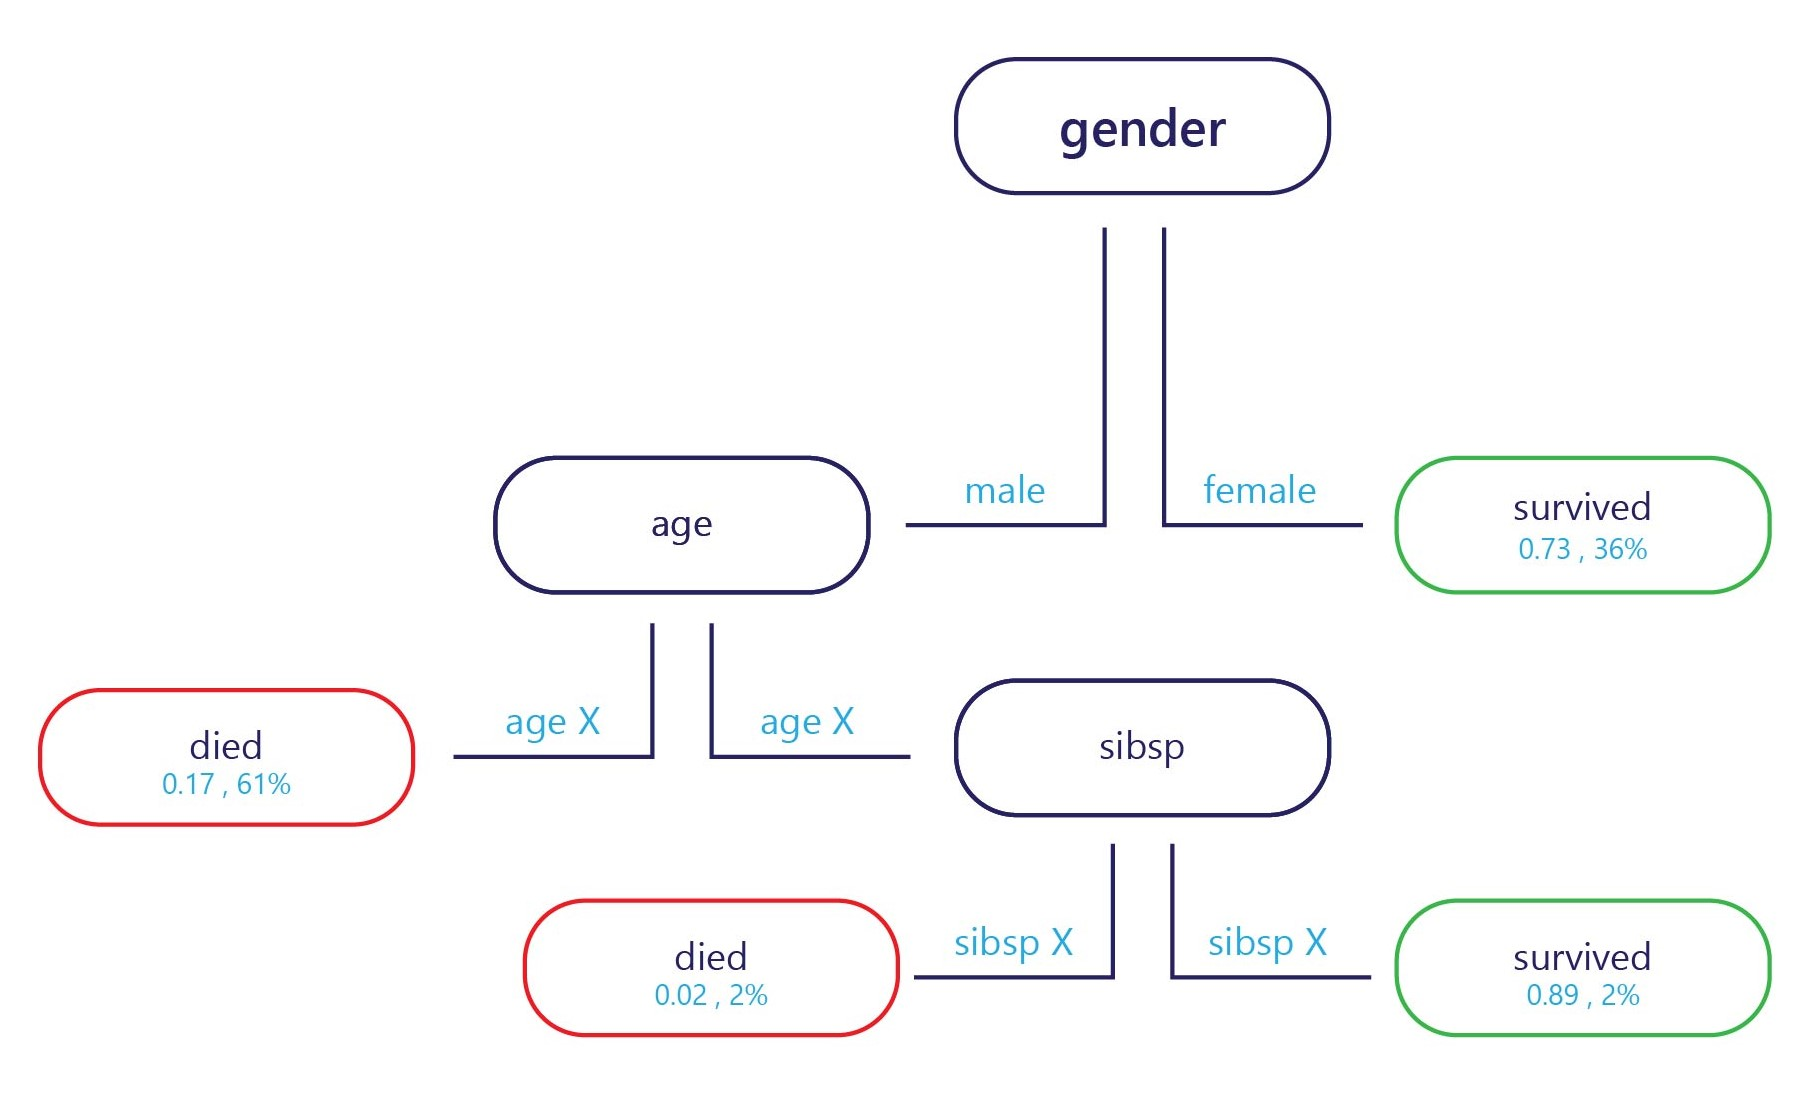


The sample if provided at the entry point (top, in the diagram above) and each exit point has a label (bottom in the diagram). At each node, a simple "if" statement decides which branch the sample passes to next. Once the branch has reached the end of the tree (the leaves), it will be assigned to a label.


## How are decision trees trained?

Decision trees are trained one node, or decision point, at a time. At the first node, the entire training-set is assessed. From there, a feature is selected that can best separate the set into two subsets that have more homogenous labels. For example, imagine our training set was as follows:

| Weight (Feature) | Age (Feature) | Won a medal (Label) |
| ---------------- | ------------- | ------------------- |
| 90               | 18            | No                  |
| 80               | 20            | No                  |
| 70               | 19            | No                  |
| 70               | 25            | No                  |
| 60               | 18            | Yes                 |
| 80               | 28            | Yes                 |
| 85               | 26            | Yes                 |
| 90               | 25            | Yes                 |

If we're doing our best to find a rule to split this data, we might split by age at around 24 years old, because most medal winners were over 24. This split would give us two subsets of data.

**Subset 1:**

| Weight (Feature) | Age (Feature) | Won a medal (Label) |
| ---------------- | ------------- | ------------------- |
| 90               | 18            | No                  |
| 80               | 20            | No                  |
| 70               | 19            | No                  |
| 60               | 18            | Yes                 |

**Subset 2:**

| Weight (Feature) | Age (Feature) | Won a medal (Label) |
| ---------------- | ------------- | ------------------- |
| 70               | 25            | No                  |
| 80               | 28            | Yes                 |
| 85               | 26            | Yes                 |
| 90               | 25            | Yes                 |

If we stop here, we have a simple model with one node and two leaves. Leaf 1 contains non-medal winners, and is 75% accurate on our training set. Leaf 2 contains medal winners, and is also 75% accurate on the training set.

We don’t need to stop here, though. We can continue this process by splitting the leaves further.

In subset 1, the first new node could split by weight, because the only medal winner had a weight less than people who didn't win a medal. The rule might be set to "weight < 65". People with weight < 65 are predicted to have won a medal, while anyone with weight ≥65 don't meet this criterion, and might be predicted to not win a medal.

In subset 2, the second new node might also split by weight, but this time predicts that anyone with a weight over 70 would have won a medal, while those under it wouldn't.

This would provide us with a tree that could achieve 100% accuracy on the training set.

## Strengths and weaknesses of decision trees
Decision trees are considered to have low bias. This means that they're usually good at identifying features that are important in order to label something correctly.

The major weakness of decision trees is overfitting. Consider the example given previously: the model gives an exact way to calculate who is likely to win a medal, and this will predict 100% of the training dataset correctly. This level of accuracy is unusual for machine learning models, which normally make numerous errors on training dataset. Good training performance isn't a bad thing in itself, but the tree has become so specialized to the training set that it probably won't do well on the test set. This is because the tree has managed to learn relationships in the training set that probably aren't real, such as that having a weight of 60 kg guarantees a medal if you're under 25 years old.

## Model architecture affects overfitting
How we structure our decision tree is key to avoiding its weaknesses. The deeper the tree is, the more likely it is to overfit the training set. For example, in the simple tree above, if we limited the tree to only the first node, it would make errors on the training set, but probably do better on the test set. This is because it would have more general rules about who wins medals, such as "athletes over 24," rather than extremely specific rules that might only apply to the training set.

Although we're focused on trees here, other complex models often have similar weakness that we can mitigate through decisions about how they're structured or how they're allowed to be manipulated by the training.